In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import os


In [6]:
os.chdir("C:\\Users\\TBRC-lap35\\Desktop\\Assignments\\XGBoost")

In [5]:

df = pd.read_csv("C:\\Users\\TBRC-lap35\\Downloads\\adult.data",names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","attributes"])
test = pd.read_csv("C:\\Users\\TBRC-lap35\\Downloads\\adult.test",names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","attributes"])

In [9]:
test.to_excel("test.xlsx")

In [8]:
#removning the first column in test set
test = test.iloc[1:,]
test.reset_index(drop=True,inplace = True)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,attributes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,attributes
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [7]:
#replacning "." in the attributes in test dataset
for i in range(0,len(test.attributes)):
    test["attributes"][i] = test["attributes"][i].replace(".","")

<ipython-input-7-fd5966a10c69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["attributes"][i] = test["attributes"][i].replace(".","")


# Data Analysis and Feature engineering 

In [8]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
columns = ["workclass","education","marital_status","occupation","relationship","race","sex","native_country","attributes"]

In [10]:
#removing unwanted spaces in columns
for i in columns:
    df[i] = df[i].str.strip()
    test[i]=test[i].str.strip()

In [11]:
for i in columns:
    print(df[i].value_counts(),"\n","="*50)
    print("\n")
    print(test[i].value_counts(),"\n","="*50)
    
    

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 


Private             11210
Self-emp-not-inc     1321
Local-gov            1043
?                     963
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: workclass, dtype: int64 
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 


HS-grad         5283
Some-college    3587
Bachelors       2670
Masters          934

In [12]:
#Replacing "?" values with Mode 
df["workclass"].replace("?",df["workclass"].mode()[0],inplace = True)
test["workclass"].replace("?",test["workclass"].mode()[0],inplace = True)

In [13]:
#Replace 1st-4th,5th-6th,7th-8th,9th,10th to elementary school
#Replace 11th, 12th with HS-grad
sch = ["1st-4th","5th-6th","7th-8th","9th","10th"]
hsgrad = ["11th","12th"]
df["education"].replace(to_replace=sch,value = "elementary_school",inplace=True)
df["education"].replace(to_replace=hsgrad,value = "HS-grad",inplace=True)
test["education"].replace(to_replace=sch,value = "elementary_school",inplace=True)
test["education"].replace(to_replace=hsgrad,value = "HS-grad",inplace=True)

In [14]:
#Replacning the marital_status into two categories married and unmarried
married = ["Married-civ-spouse","Divorced","Separated","Widowed","Married-spouse-absent","Married-AF-spouse"]
unmarried = ["Never-married"]
df["marital_status"].replace(to_replace=married,value = "married",inplace=True)
df["marital_status"].replace(to_replace=unmarried,value = "unmarried",inplace=True)
test["marital_status"].replace(to_replace=married,value = "married",inplace=True)
test["marital_status"].replace(to_replace=unmarried,value = "unmarried",inplace=True)

In [15]:
#replacing the ? with the mode of the column
df["occupation"].replace("?",df["occupation"].mode()[0],inplace = True)
test["occupation"].replace("?",test["occupation"].mode()[0],inplace = True)

In [16]:
#replacing the ? with the mode of the column
df["native_country"].replace("?",df["native_country"].mode()[0],inplace = True)
test["native_country"].replace("?",test["native_country"].mode()[0],inplace = True)

In [17]:
df["attributes"].value_counts()

<=50K    24720
>50K      7841
Name: attributes, dtype: int64

In [18]:
test["attributes"].value_counts()

<=50K    12435
>50K      3846
Name: attributes, dtype: int64

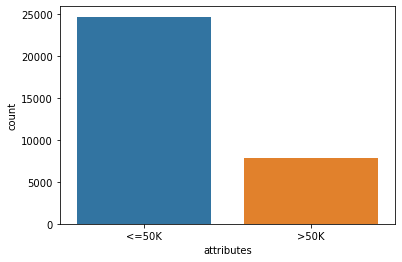

In [19]:
sns.countplot(x = "attributes",data = df)

#the given dataset is an imbalanced dataset since the count of each variable attributes column has a huge variance.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

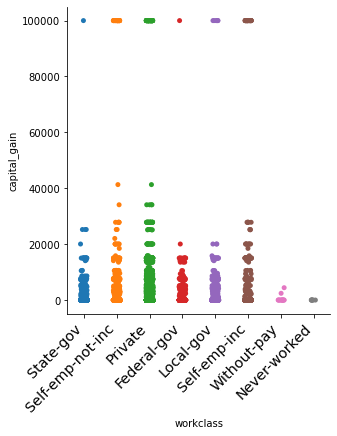

In [20]:
sns.catplot(x = "workclass",y = "capital_gain",data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

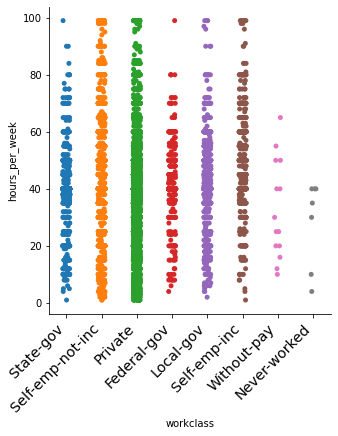

In [21]:
sns.catplot(x = "workclass",y = "hours_per_week",data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

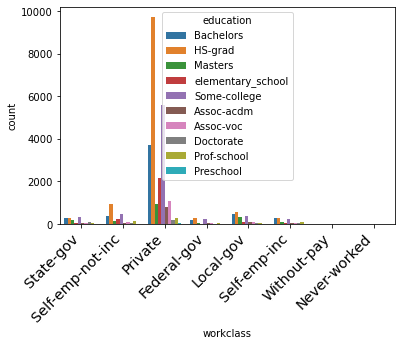

In [22]:
sns.countplot(x = "workclass",data=df,hue = "education" )
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

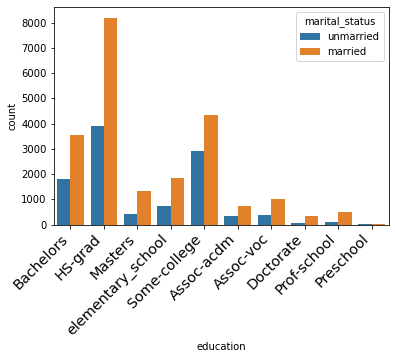

In [23]:
sns.countplot(x = "education",data=df,hue = "marital_status" )
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

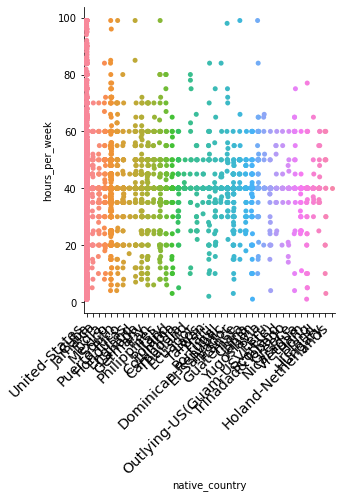

In [24]:
sns.catplot(x = "native_country",y = "hours_per_week",data=df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

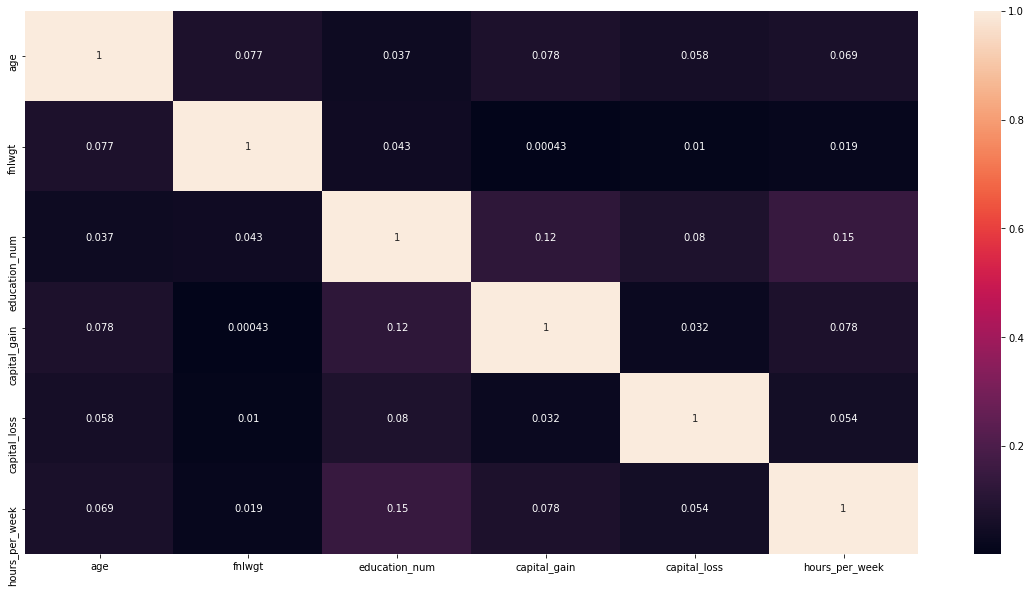

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df.corr().abs(),annot=True)

In [26]:
#dividing the data into input and output
x = df.drop(columns = ["attributes"])
y = df["attributes"]
test_x = test.drop(columns = ["attributes"])
test_y = test["attributes"]

In [27]:
num_cols = ["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]
cat_cols = ["workclass","education","marital_status","occupation","relationship","race","sex","native_country"]

In [28]:
#converting the character variables into dummy values
dumm = pd.get_dummies(x[cat_cols])
dumm_test = pd.get_dummies(test_x[cat_cols])


In [29]:
#scaling the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(x[num_cols])
scaled_data_test=scaler.fit_transform(test_x[num_cols])


In [30]:
#converting the data into dataframes
scaled_data = pd.DataFrame(scaled_data,columns= num_cols)
scaled_data_test = pd.DataFrame(scaled_data_test,columns= num_cols)

In [31]:
#removning the unwanted columns to avoin dummy variable trap
dumm.drop(columns = ["workclass_Never-worked","education_Preschool","marital_status_unmarried","occupation_Armed-Forces","relationship_Wife","race_Other","sex_Female","native_country_Holand-Netherlands"],inplace=True)
dumm_test.drop(columns = ["workclass_Never-worked","education_Preschool","marital_status_unmarried","occupation_Armed-Forces","relationship_Wife","race_Other","sex_Female"],inplace=True)

In [32]:
#Combning the scaled and dummy variable data
x_inp = pd.concat([scaled_data,dumm],axis=1)
x_inp_test = pd.concat([scaled_data_test,dumm_test],axis=1)

In [33]:
#splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x_inp,y,test_size = 0.25,random_state=355)

In [34]:
X = pd.concat([x_train,y_train],axis = 1)

In [35]:
#balancing the dataset using Random Over-Sampling method
class_o = X[X.attributes=="<=50K"]
class_1  = X[X.attributes==">50K"]

In [36]:
# class count
class_count_0, class_count_1 = X['attributes'].value_counts()

In [37]:
class_1_over = class_1.sample(class_count_0,replace = True)

In [38]:
class_1_over.shape

(18546, 87)

In [39]:
over_sampled = pd.concat([class_o,class_1_over])

In [40]:
over_sampled["attributes"].value_counts()

<=50K    18546
>50K     18546
Name: attributes, dtype: int64

In [41]:
over_sampled_x = over_sampled.drop(columns = ["attributes"])
over_sampled_y = over_sampled["attributes"]

# Developing the model

In [42]:
# fit model no training data
model = XGBClassifier(objective='binary:logistic')
model.fit(over_sampled_x, over_sampled_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
y_pred = model.predict(x_train)
predictions = [(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.8825143325143325

In [44]:
y_pred = model.predict(x_inp_test)
predictions = [(value) for value in y_pred]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8257478041889319

In [45]:
#Hyperparameter tuning using GridSearchCV
param_grid={
   
    'learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [46]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [47]:
grid.fit(over_sampled_x,over_sampled_y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.830, total=   1.0s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.835, total=   0.3s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.819, total=   0.3s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.820, total=   0.3s
[CV] learning_rate=1, max_depth=3, n_estimators=10 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=10, score=0.827, total=   0.3s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.854, total=   0.7s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.860, total=   0.7s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.852, total=   0.7s
[CV] learning_rate=1, max_depth=3, n_estimators=50 ...................
[CV]  learning_rate=1, max_depth=3, n_estimators=50, score=0.847, total=   0.7s
[CV] learning_

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 40.9min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [49]:
grid.best_params_

{'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 200}

In [50]:
new_model=XGBClassifier(learning_rate= 0.5, max_depth= 20, n_estimators= 200)
new_model.fit(over_sampled_x, over_sampled_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
#Training accuracy on over sampled data
y_pred_over = new_model.predict(over_sampled_x)
predictions = [(value) for value in y_pred_over]
accuracy = accuracy_score(over_sampled_y,predictions)
accuracy

0.9999730400086272

In [53]:
confusion_matrix(over_sampled_y,y_pred_over)

array([[18545,     1],
       [    0, 18546]], dtype=int64)

In [54]:
#Accuracy on test data
y_pred_test = new_model.predict(x_test)
predictions = [(value) for value in y_pred_test]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8469475494411006

In [55]:
confusion_matrix(y_test,y_pred_test)

array([[5592,  582],
       [ 664, 1303]], dtype=int64)

In [56]:
#Accuracy on test file

y_pred_test_file = new_model.predict(x_inp_test)
predictions = [(value) for value in y_pred_test_file]
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8372335851606166

In [58]:
confusion_matrix(test_y,y_pred_test_file)

array([[11261,  1174],
       [ 1476,  2370]], dtype=int64)

# Deployment

In [60]:
# saving the model to the local file system
import pickle
filename = 'finalized_model.pickle'
pickle.dump(new_model, open(filename, 'wb'))